## Метод k-ближайших соседей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем наш датасет.

In [2]:
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Теперь займёмся подбором оптимального количества соседей. Видим, что минимальная ошибка при k=50.

Minimum error:- 0.19852941176470587 at K = 50


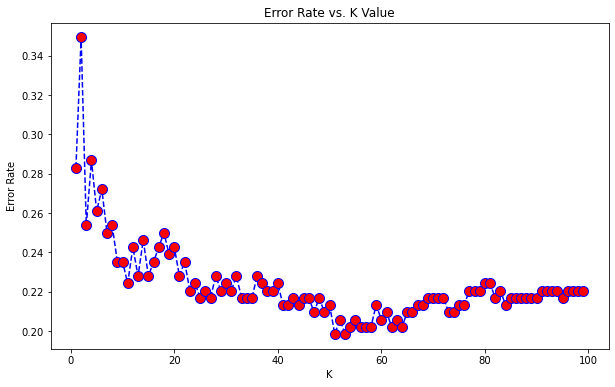

In [3]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,100):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Строим модель с полученными параметрами. ВИдим, что её качество немного лучше, чем логистическая регрессия.

In [4]:
knn = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 2).fit(X_train, y_train)

In [5]:
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.7867647058823529

Посмотрим на матрицу сопряженности. Видим, что модель 214 объектов распознала верно и 58 нет. Точность модели: 78,6%. Доля ошибок: 21,4%.

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 39  42]
 [ 16 175]]


## Можем сделать промежуточный вывод, что метод k-ближайших соседей лучше классифицирует университеты, чем логистическая регрессия и тем более, чем НС.